In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

%matplotlib inline
plt.style.use("bmh")

# Treasuries Quaterly Data

In [34]:
treasuries = pd.read_csv("treasuries-data.csv", low_memory= False)
treasuries["caldt"] = pd.to_datetime(treasuries["caldt"])
treasuries.set_index("caldt",inplace= True)
treasuries.head()

,b30ret,b30ind,b10ret,b10ind,b2ret,b2ind,t30ret,t30ind
caldt,,,,,,,,
1978-03-31,-0.009965,124.5612,-0.003646,133.0843,0.009075,140.8629,0.015410,137.4749
1978-06-30,-0.012055,123.0598,-0.011453,131.5602,0.006219,141.7390,0.016488,139.7416
1978-09-29,0.029325,126.6684,0.026071,134.9901,0.016095,144.0203,0.017203,142.1456
1978-12-29,-0.011711,125.1850,-0.016162,132.8084,-0.002373,143.6785,0.022071,145.2829
1979-03-30,0.016868,127.2967,0.026146,136.2808,0.029448,147.9095,0.024328,148.8174


In [35]:
treasuries = treasuries[["b2ind","b10ind"]]
treasuries.head()

,b2ind,b10ind
caldt,,
1978-03-31,140.8629,133.0843
1978-06-30,141.7390,131.5602
1978-09-29,144.0203,134.9901
1978-12-29,143.6785,132.8084
1979-03-30,147.9095,136.2808


In [40]:
treasuries["yield_curve_inverted"] = treasuries.apply(lambda x: x.is_monotonic_decreasing, axis = 1)
caldt = treasuries.index.to_list()
treasuries[treasuries["yield_curve_inverted"]].head()

,b2ind,b10ind,yield_curve_inverted
caldt,,,
1978-03-31,140.8629,133.0843,True
1978-06-30,141.7390,131.5602,True
1978-09-29,144.0203,134.9901,True
1978-12-29,143.6785,132.8084,True
1979-03-30,147.9095,136.2808,True


# Yahoo

In [41]:
from datetime import datetime
start = pd.to_datetime("1900-01-01")
ticker_name = "^SP500TR"
end = pd.to_datetime("2019-01-01")
# end = pd.to_datetime(datetime.now().date())
period, recession_cycles = "1mo", 6
snp500 = yf.download(ticker_name, start=start, end=end, interval=period)[["Adj Close"]].dropna()
snp500.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1988-02-01,269.480011
1988-03-01,261.149994
1988-04-01,264.040009
1988-05-01,266.320007
1988-06-01,278.540009


In [42]:
recession = []
for x in range(len(snp500) - recession_cycles +1):
    t = snp500["Adj Close"][x:x+recession_cycles]
    recession.append(t.is_monotonic_decreasing)
recession = recession + [False]*(recession_cycles-1)

snp500["recession"] = recession
snp500[snp500["recession"]].head()

,Adj Close,recession
Date,,
1990-05-01,393.799988,True
2007-10-01,2423.669922,True
2011-04-01,2305.760010,True


Text(0.5, 1.0, '13wk/10yr Yield Curve Inversions, Recessions & Equity Market Performance, 1900 - 2019 (Period: 1mo)')

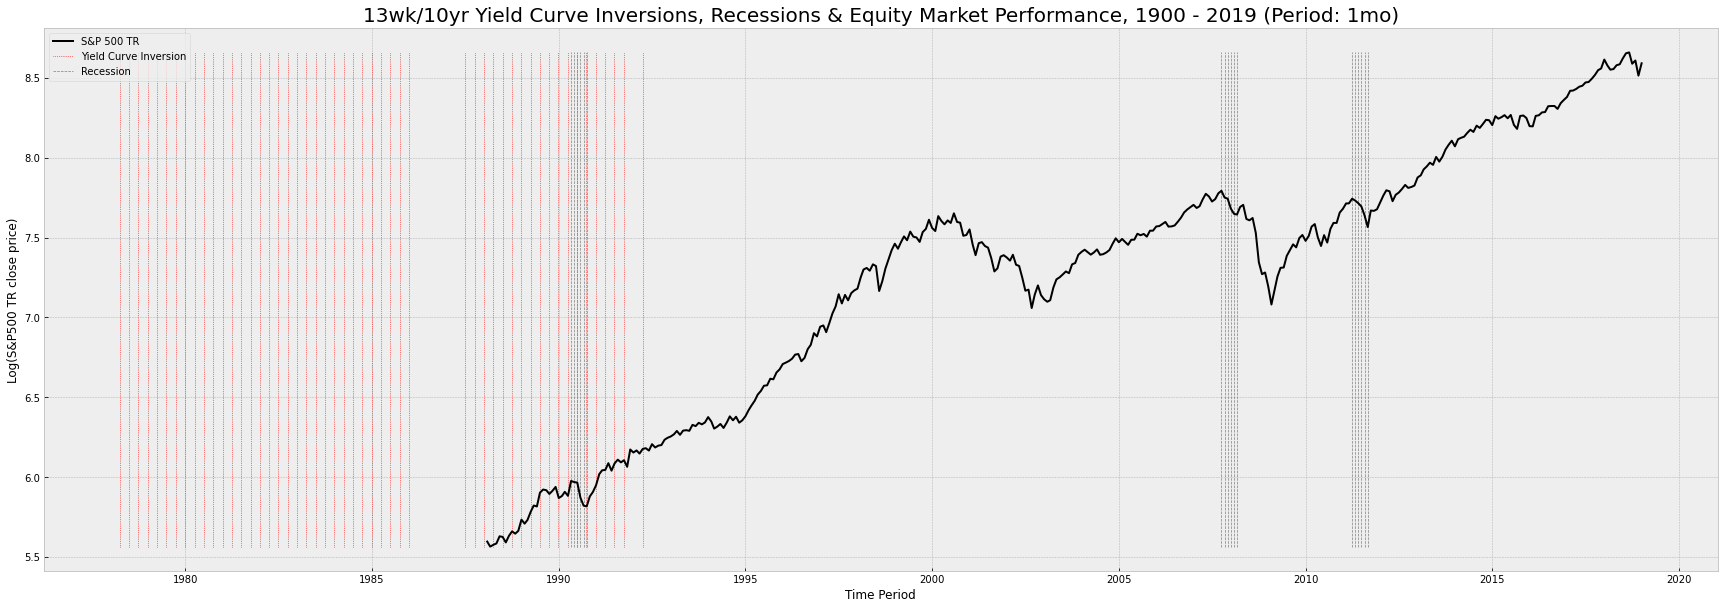

In [43]:
plt.figure().set_size_inches(30, 10,  forward=True)
plt.plot(np.log(snp500["Adj Close"]), label = "S&P 500 TR", color = "black")
plt.vlines(treasuries[treasuries["yield_curve_inverted"]].index, colors= "red",
            ymin= np.log(snp500["Adj Close"].min()), ymax= np.log(snp500["Adj Close"].max()),
            linewidth = 0.7, linestyles = "dotted", label= "Yield Curve Inversion")
plt.vlines([t+pd.DateOffset(months = k) for t in snp500[snp500["recession"]].index for k in range(recession_cycles)],
            colors= "grey", ymin= np.log(snp500["Adj Close"].min()), ymax= np.log(snp500["Adj Close"].max()),
            linewidth = 0.7, linestyles = "dashed" , label= "Recession")
plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Log(S&P500 TR close price)")
plt.title("13wk/10yr Yield Curve Inversions, Recessions & Equity Market Performance, {start} - {end} (Period: {period})".format(start = start.year, end = end.year, period = period), fontsize = 20)

***
***